In [1]:
from sklearn import preprocessing 
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
digit= load_digits()
x=digit.data
y=digit.target

In [3]:
x.shape, y.shape

((1797L, 64L), (1797L,))

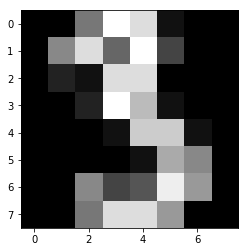

In [4]:
plt.imshow(x[3].reshape(8,8),cmap=plt.cm.gray)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn import model_selection

In [7]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.3,random_state=42)

In [8]:
kfold=model_selection.KFold(n_splits=10,random_state=7)

In [9]:
model=LogisticRegression()

In [10]:
scoring='accuracy'

In [11]:
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)

In [12]:
results

array([0.90555556, 0.95      , 0.89444444, 0.91666667, 0.94444444,
       0.97222222, 0.97777778, 0.95530726, 0.8603352 , 0.93854749])

# Classification accuracy

In [13]:
print("Accuracy: %.3f (%.3f)") %(results.mean(),results.std())

Accuracy: 0.932 (0.035)


# Logarithmic loss

In [14]:
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='neg_log_loss')

In [27]:
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='neg_log_loss')

In [28]:
print("logarithmic loss: %.3f (%.3f)") %(results.mean(),results.std())

logarithmic loss: -0.344 (0.220)


# Mean absolute error

In [16]:
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='neg_mean_absolute_error')

In [17]:
print("Mean absolute error: %.3f (%.3f)") %(results.mean(),results.std())

Mean absolute error: -0.277 (0.144)


# Mean squared error

In [18]:
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='neg_mean_squared_error')

In [19]:
print("Mean squared error: %.3f (%.3f)") %(results.mean(),results.std())

Mean squared error: -1.452 (0.805)


# Confusion matrix

In [20]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
predicted=model.predict(x_test)

In [22]:
matrix=confusion_matrix(y_test,predicted)

In [23]:
print(matrix)

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 43  1  0  0  0  0  0  6  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  1  0  0  1  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  2  1  0  0 61  0  1  1  0]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  0  0  1  0  0 41  0]
 [ 0  0  0  0  0  0  0  0  5 54]]


# Classification report

In [24]:
report=classification_report(y_test,predicted)

In [25]:
print(report)

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        53
          1       0.91      0.86      0.89        50
          2       0.96      1.00      0.98        47
          3       1.00      0.96      0.98        54
          4       0.98      0.98      0.98        60
          5       0.95      0.92      0.94        66
          6       1.00      0.98      0.99        53
          7       0.98      0.98      0.98        55
          8       0.76      0.95      0.85        43
          9       0.98      0.92      0.95        59

avg / total       0.96      0.95      0.95       540



# R2 metrics

In [26]:
results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='r2')

In [29]:
results

array([-0.45778991, -0.14434019, -0.61739005, -0.27333073, -0.27594791,
       -0.12824496, -0.11027347, -0.12335714, -0.62604368, -0.6855272 ])